In [1]:
import os.path
import pandas as pd
import numpy as np 

In [2]:
#"tree.csv" is the original dataset provided 

In [3]:
DATA_DIR = os.path.join("tree.csv")

In [4]:
#put data into pandas dataframe 
tree_data = pd.read_csv(DATA_DIR, index_col=0)
pd.set_option('display.max_columns', 1000)

# Initial Data Cleaning & Analysis

In [5]:
tree_data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [6]:
tree_data.shape

(15120, 55)

**Let's rename our columns**

In [7]:
tree_data.rename(columns={'Horizontal_Distance_To_Hydrology': 'hDist_Water', 'Vertical_Distance_To_Hydrology': 'vDist_Water', 'Horizontal_Distance_To_Roadways': 'hDist_Road', 'Hillshade_9am': 'shade_9am', 'Hillshade_Noon': 'shade_noon', 'Hillshade_3pm': 'shade_3pm', 'Horizontal_Distance_To_Fire_Points': 'hDist_Fire', 'Wilderness_Area1': 'WA1', 'Wilderness_Area2': 'WA2', 'Wilderness_Area3': 'WA3', 'Wilderness_Area4': 'WA4', 'Cover_Type': 'Tree_Type'}, inplace=True)
tree_data.columns = tree_data.columns.str.replace('Soil_Type', 'ST')

## Distribution of counts - tree_types, soil types, and wilderness areas!

**tree_type**

In [8]:
print(tree_data[tree_data.Tree_Type==1].shape)
print(tree_data[tree_data.Tree_Type==2].shape)
print(tree_data[tree_data.Tree_Type==3].shape)
print(tree_data[tree_data.Tree_Type==4].shape)
print(tree_data[tree_data.Tree_Type==5].shape)
print(tree_data[tree_data.Tree_Type==6].shape)
print(tree_data[tree_data.Tree_Type==7].shape)

(2160, 55)
(2160, 55)
(2160, 55)
(2160, 55)
(2160, 55)
(2160, 55)
(2160, 55)


each Tree_Type has the same number of rows (2160)

**soil types**

In [9]:
(tree_data == 0).all(axis=0)

Elevation      False
Aspect         False
Slope          False
hDist_Water    False
vDist_Water    False
hDist_Road     False
shade_9am      False
shade_noon     False
shade_3pm      False
hDist_Fire     False
WA1            False
WA2            False
WA3            False
WA4            False
ST1            False
ST2            False
ST3            False
ST4            False
ST5            False
ST6            False
ST7             True
ST8            False
ST9            False
ST10           False
ST11           False
ST12           False
ST13           False
ST14           False
ST15            True
ST16           False
ST17           False
ST18           False
ST19           False
ST20           False
ST21           False
ST22           False
ST23           False
ST24           False
ST25           False
ST26           False
ST27           False
ST28           False
ST29           False
ST30           False
ST31           False
ST32           False
ST33           False
ST34         

we can see that 'ST7' and 'ST15' are binary columns that don't have any 1's... **can remove those two.**

In [10]:
tree_data.drop('ST7', axis=1, inplace=True)
tree_data.drop('ST15', axis=1, inplace=True)

I am also going to add another column that lists the soil type (soil_type) - this will help with analysis

In [11]:
tree_data['soil_type'] = tree_data[['ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40']].idxmax(axis=1)

**wildnerness areas**

In [12]:
print(tree_data[tree_data.WA1==1].shape)
print(tree_data[tree_data.WA2==1].shape)
print(tree_data[tree_data.WA3==1].shape)
print(tree_data[tree_data.WA4==1].shape)

(3597, 54)
(499, 54)
(6349, 54)
(4675, 54)


In [13]:
#much less WA2 compared to the other 3 areas 

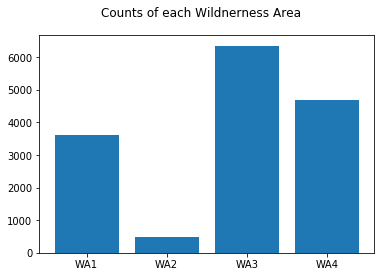

In [14]:
import matplotlib.pyplot as plt

WA_counts = {'WA1': 3597, 'WA2': 499, 'WA3': 6349, 'WA4': 4675}
names = list(WA_counts.keys())
values = list(WA_counts.values())

plt.bar(names, values)
plt.suptitle("Counts of each Wildnerness Area")
plt.show()

all pretty even, except there's significantly less Wilderness Areas 2 compared to the rest

Going to add a new column (WA_type) - one column that lists the wilderness area - will help with analysis

In [15]:
tree_data['WA_type'] = tree_data[['WA1', 'WA2', 'WA3', 'WA4']].idxmax(axis=1)

In [16]:
#tree_data.to_csv('tree_FINAL')
#this dataset includes the 2 columns for soil types and wilderness area. also removed the two soil types that are all 0's

# Initial Tree Type Analysis

**average elevation level per tree_type**

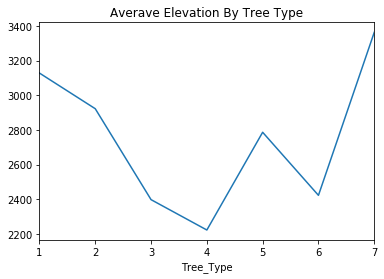

In [17]:
tree_data.groupby('Tree_Type').Elevation.mean().plot()
plt.title("Averave Elevation By Tree Type")
plt.show()


**distribution of wilderness areas per tree_type**

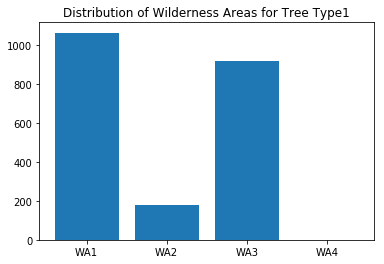

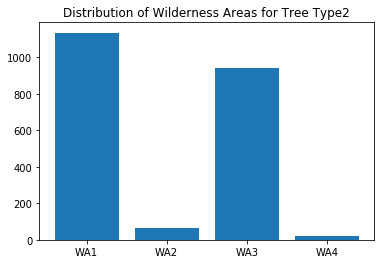

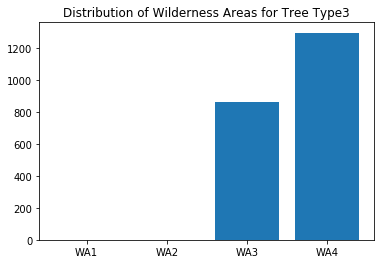

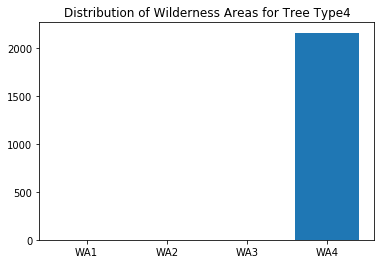

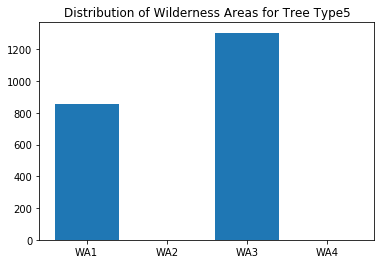

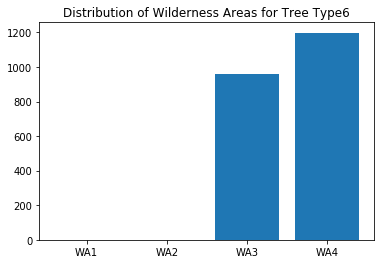

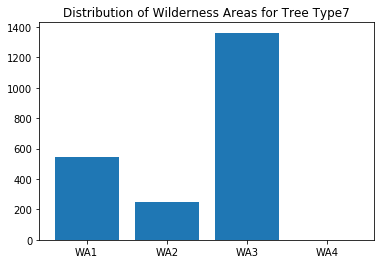

In [18]:
def count(Tree):
    for i in Tree:
        TreeTypei = tree_data[tree_data.Tree_Type==i]
        a= (TreeTypei.WA1.sum())
        b= (TreeTypei.WA2.sum())
        c= (TreeTypei.WA3.sum())
        d= (TreeTypei.WA4.sum())


        WA_TreeTypei = {'WA1': a, 'WA2': b, 'WA3': c, 'WA4': d}
        names = list(WA_TreeTypei.keys())
        values = list(WA_TreeTypei.values())

        plt.bar(names, values)
        plt.title("Distribution of Wilderness Areas for Tree Type" + str(i))
        plt.show()
        
count([1, 2, 3, 4, 5, 6, 7])        

**Let's look at the average elevation for each Wilderness Areas** 

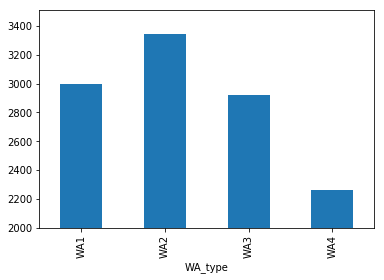

In [19]:
elevation_tree = tree_data.groupby("WA_type").Elevation.mean()
elevation_tree.plot(kind='bar')
plt.ylim(2000)
plt.show()

# EDA

## **highest correlated features**

In [20]:
corr_matrix = tree_data.corr().abs()
corr_list = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

corr_list.head(10)

Elevation    WA4            0.783651
shade_9am    shade_3pm      0.779965
hDist_Water  vDist_Water    0.652142
Aspect       shade_3pm      0.635022
shade_noon   shade_3pm      0.614526
Slope        shade_noon     0.612613
Aspect       shade_9am      0.593997
Elevation    hDist_Road     0.578659
WA3          WA4            0.569200
WA1          ST29           0.546309
dtype: float64

## **going to plot scatterplots of the most correlated variables**

**Shade_9am vs Shade_3pm**

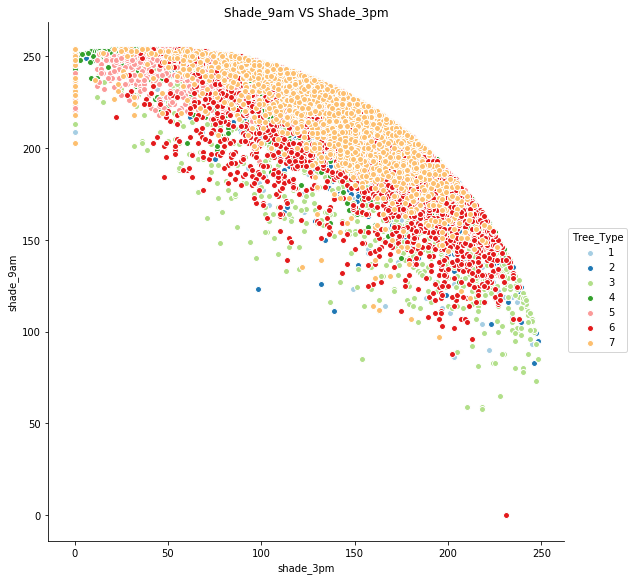

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of shade_9am and shade_3pm
sns.pairplot(tree_data, size=8, y_vars='shade_9am', x_vars='shade_3pm', hue = 'Tree_Type', palette="Paired")
plt.title("Shade_9am VS Shade_3pm")
plt.show()

**hDist_Water vs vDist_Water**

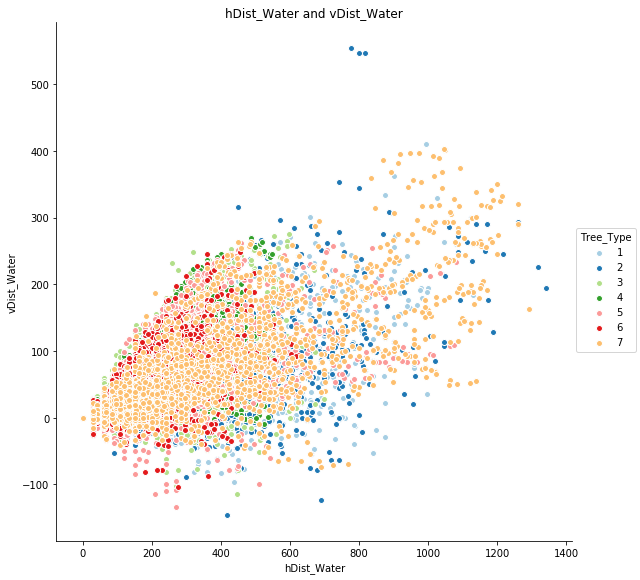

In [22]:
# Scatter plot of hDist_Water and vDist_Water 
sns.pairplot(tree_data, size=8, x_vars='hDist_Water', y_vars='vDist_Water', hue = 'Tree_Type', palette="Paired")
plt.title("hDist_Water and vDist_Water")
plt.show()

**Aspect VS shade_3pm**

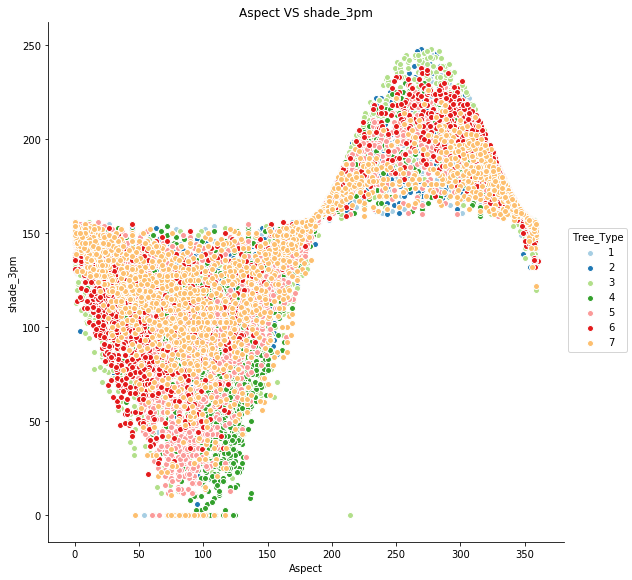

In [23]:
sns.pairplot(tree_data, size=8, x_vars='Aspect', y_vars='shade_3pm', hue = 'Tree_Type', palette="Paired")
plt.title("Aspect VS shade_3pm")
plt.show()
#looks like a sigmoid!!!

**shade_noon vs shade_3pm**

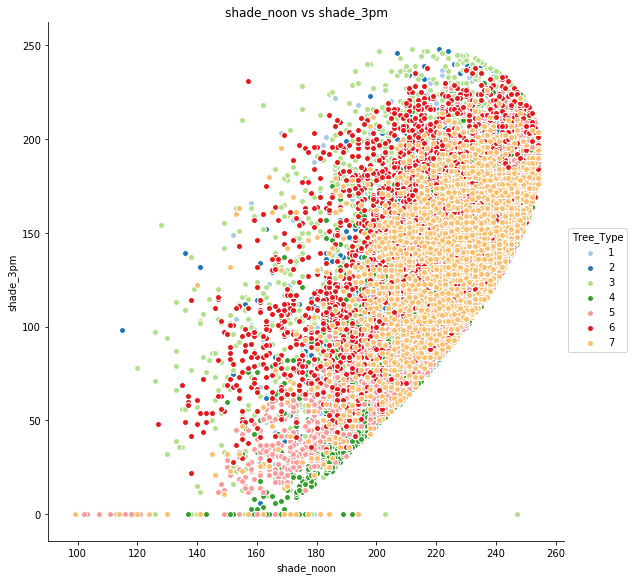

In [24]:
sns.pairplot(tree_data, size=8, x_vars='shade_noon', y_vars='shade_3pm', hue = 'Tree_Type', palette="Paired")
plt.title("shade_noon vs shade_3pm")
plt.show()

**Slope vs shade_noon**

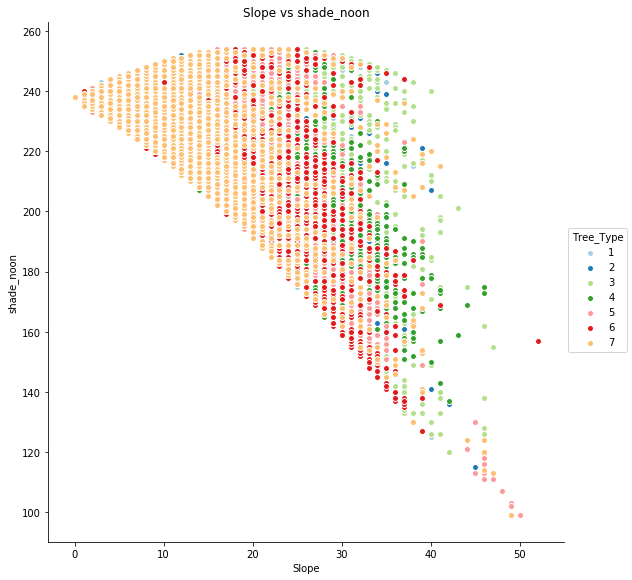

In [25]:
sns.pairplot(tree_data, size=8, x_vars='Slope', y_vars='shade_noon', hue = 'Tree_Type', palette="Paired")
plt.title("Slope vs shade_noon")
plt.show()

**Aspect vs shade_9am**

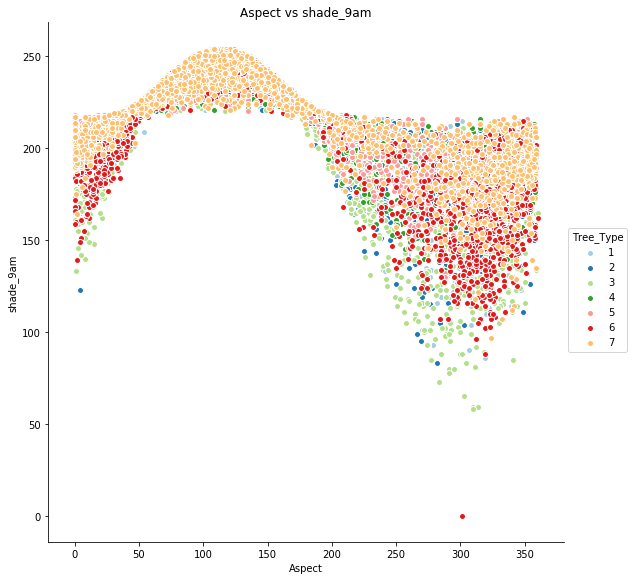

In [26]:
sns.pairplot(tree_data, size=8, x_vars='Aspect', y_vars='shade_9am', hue = 'Tree_Type', palette="Paired")
plt.title("Aspect vs shade_9am")
plt.show()

**Elevation vs hDist_Road**

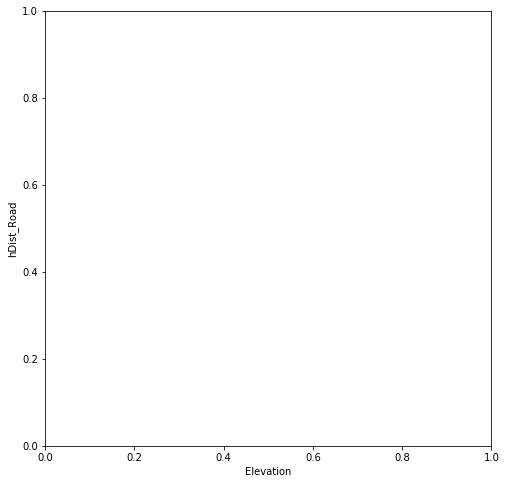

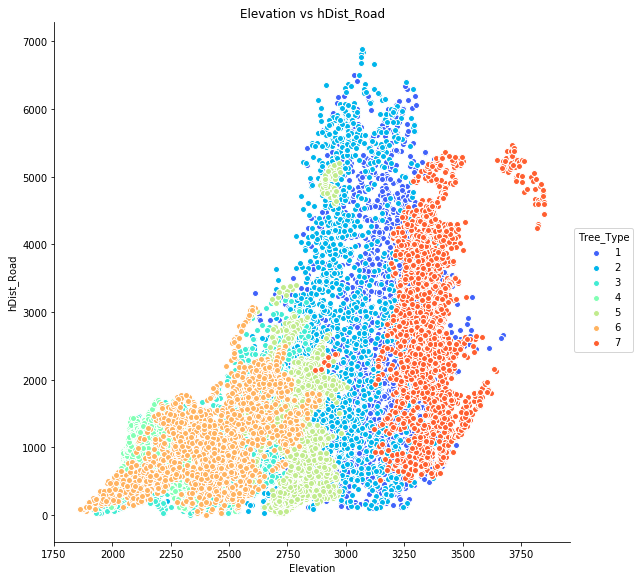

In [109]:
sns.pairplot(tree_data, size=8, x_vars='Elevation', y_vars='hDist_Road', hue = 'Tree_Type', palette="rainbow")
plt.title("Elevation vs hDist_Road")
plt.savefig("ElevationVsHDist_Road")
plt.show()

## Now let's look at the distribution of different features by tree_type

**Distribution of Elevation by Tree_Type**

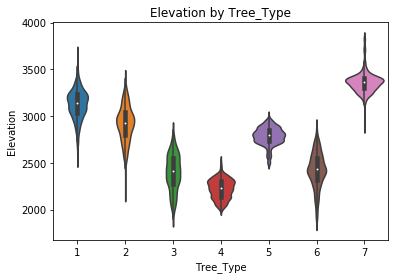

In [28]:
sns.violinplot(data=tree_data, x="Tree_Type", y="Elevation")
plt.title("Elevation by Tree_Type")
plt.show()

#very different average elevations per tree_type

**Distribution of Aspect by Tree_Type**

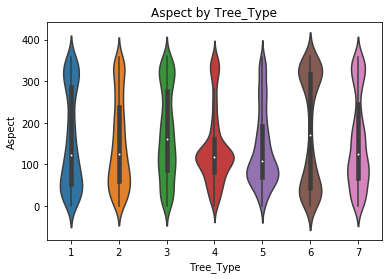

In [29]:
sns.violinplot(data=tree_data, x="Tree_Type", y="Aspect")
plt.title("Aspect by Tree_Type")
plt.show()

#relatively same distribution of aspect across different tree_types

**Distribution of Slope by Tree_Type**

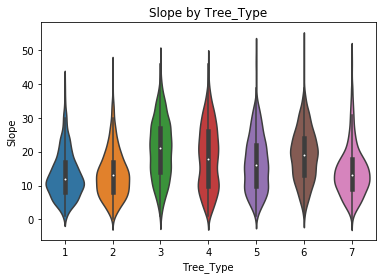

In [30]:
sns.violinplot(data=tree_data, x="Tree_Type", y="Slope")
plt.title("Slope by Tree_Type")
plt.show()

**Distribution of hDist_Water by Tree_Type**

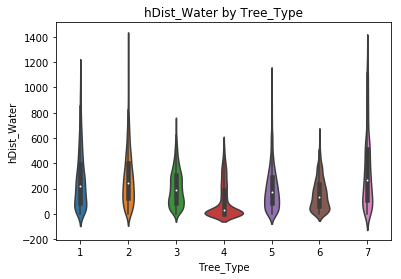

In [31]:
sns.violinplot(data=tree_data, x="Tree_Type", y="hDist_Water")
plt.title("hDist_Water by Tree_Type")
plt.show()
#Tree_Types 3,4,6 have a much lower upper threshold than the rest

**Distribution of vDist_Water by Tree_Type**

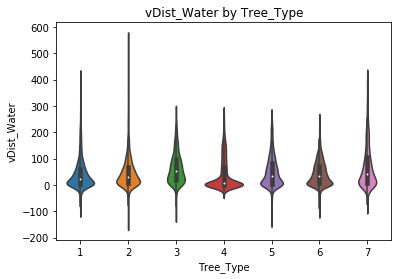

In [32]:
sns.violinplot(data=tree_data, x="Tree_Type", y="vDist_Water")
plt.title("vDist_Water by Tree_Type")
plt.show()
#results are similar to the hDist_Water, except for Tree_Type 5

**Distribution of hDist_Road by Tree_Type**

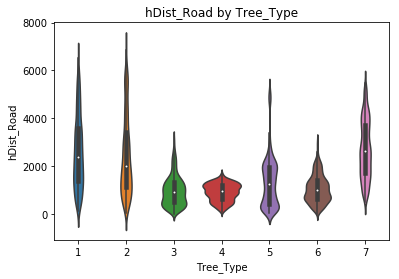

In [33]:
sns.violinplot(data=tree_data, x="Tree_Type", y="hDist_Road")
plt.title("hDist_Road by Tree_Type")
plt.show()

#distribution is similar to hDist_Water

**Distribution of shade_9am by Tree_Type**

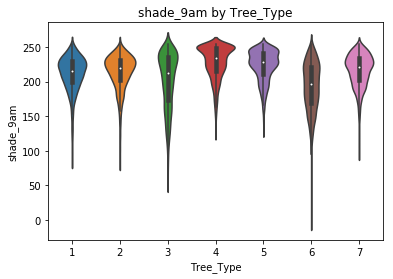

In [34]:
sns.violinplot(data=tree_data, x="Tree_Type", y="shade_9am")
plt.title("shade_9am by Tree_Type")
plt.show()

**Distribution of shade_noon by Tree_Type**

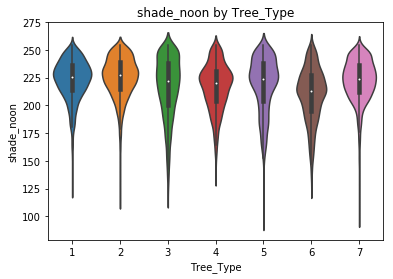

In [35]:
sns.violinplot(data=tree_data, x="Tree_Type", y="shade_noon")
plt.title("shade_noon by Tree_Type")
plt.show()

**Distribution of shade_3pm by Tree_Type**

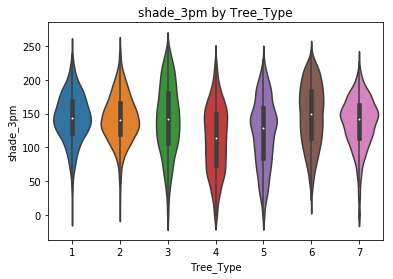

In [36]:
sns.violinplot(data=tree_data, x="Tree_Type", y="shade_3pm")
plt.title("shade_3pm by Tree_Type")
plt.show()

**Distribution of hDist_Fire by Tree_Type**

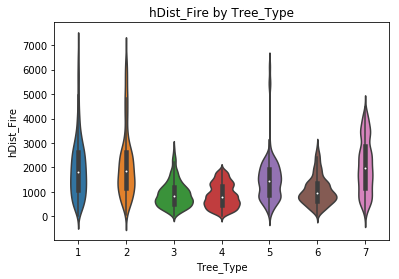

In [37]:
sns.violinplot(data=tree_data, x="Tree_Type", y="hDist_Fire")
plt.title("hDist_Fire by Tree_Type")
plt.show()
#similar to the distribution of hDist_Road

**Distribution of Wilderness Areas by Tree_Type**

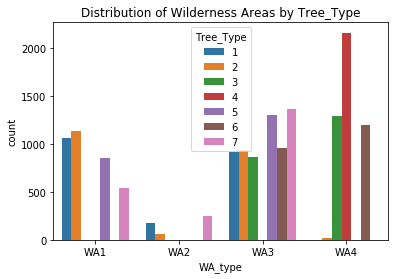

In [38]:
import seaborn as sns
sns.countplot(data=tree_data, x='WA_type', hue='Tree_Type', order = ['WA1', 'WA2', 'WA3', 'WA4'])
plt.title("Distribution of Wilderness Areas by Tree_Type")
plt.rcParams['figure.figsize']=(10,10)
plt.savefig("output.png")
plt.show()

**Distribution of Soil Types by Tree_Type**

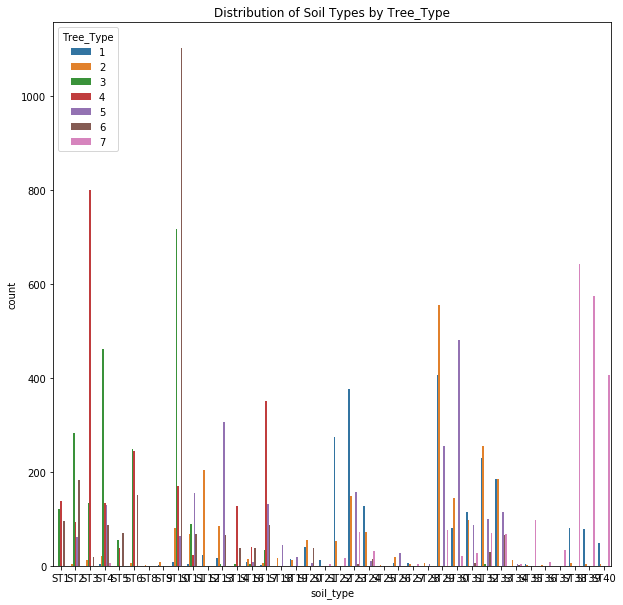

In [39]:
sns.countplot(data=tree_data, x='soil_type', hue='Tree_Type', order = ['ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40'])
plt.title("Distribution of Soil Types by Tree_Type")
plt.rcParams['figure.figsize']=(24,24)
plt.show()

# PCA Visualization

In [40]:
#make a copy of the dataset 
tree_data_pca = tree_data.copy()
tree_data_pca.drop(['soil_type', 'WA_type'], axis=1, inplace=True)

In [41]:
tree_data_pca.head()


,Elevation,Aspect,Slope,hDist_Water,vDist_Water,hDist_Road,shade_9am,shade_noon,shade_3pm,hDist_Fire,WA1,WA2,WA3,WA4,ST1,ST2,ST3,ST4,ST5,ST6,ST8,ST9,ST10,ST11,ST12,ST13,ST14,ST16,ST17,ST18,ST19,ST20,ST21,ST22,ST23,ST24,ST25,ST26,ST27,ST28,ST29,ST30,ST31,ST32,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40,Tree_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [42]:
#Standardize my X's
from sklearn.preprocessing import StandardScaler
# Separating out the features
x_data = tree_data_pca.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]]
# Separating out the target
y = tree_data_pca.Tree_Type
# Standardizing the features
x = StandardScaler().fit_transform(x_data)

In [43]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
x = pca.fit_transform(x)

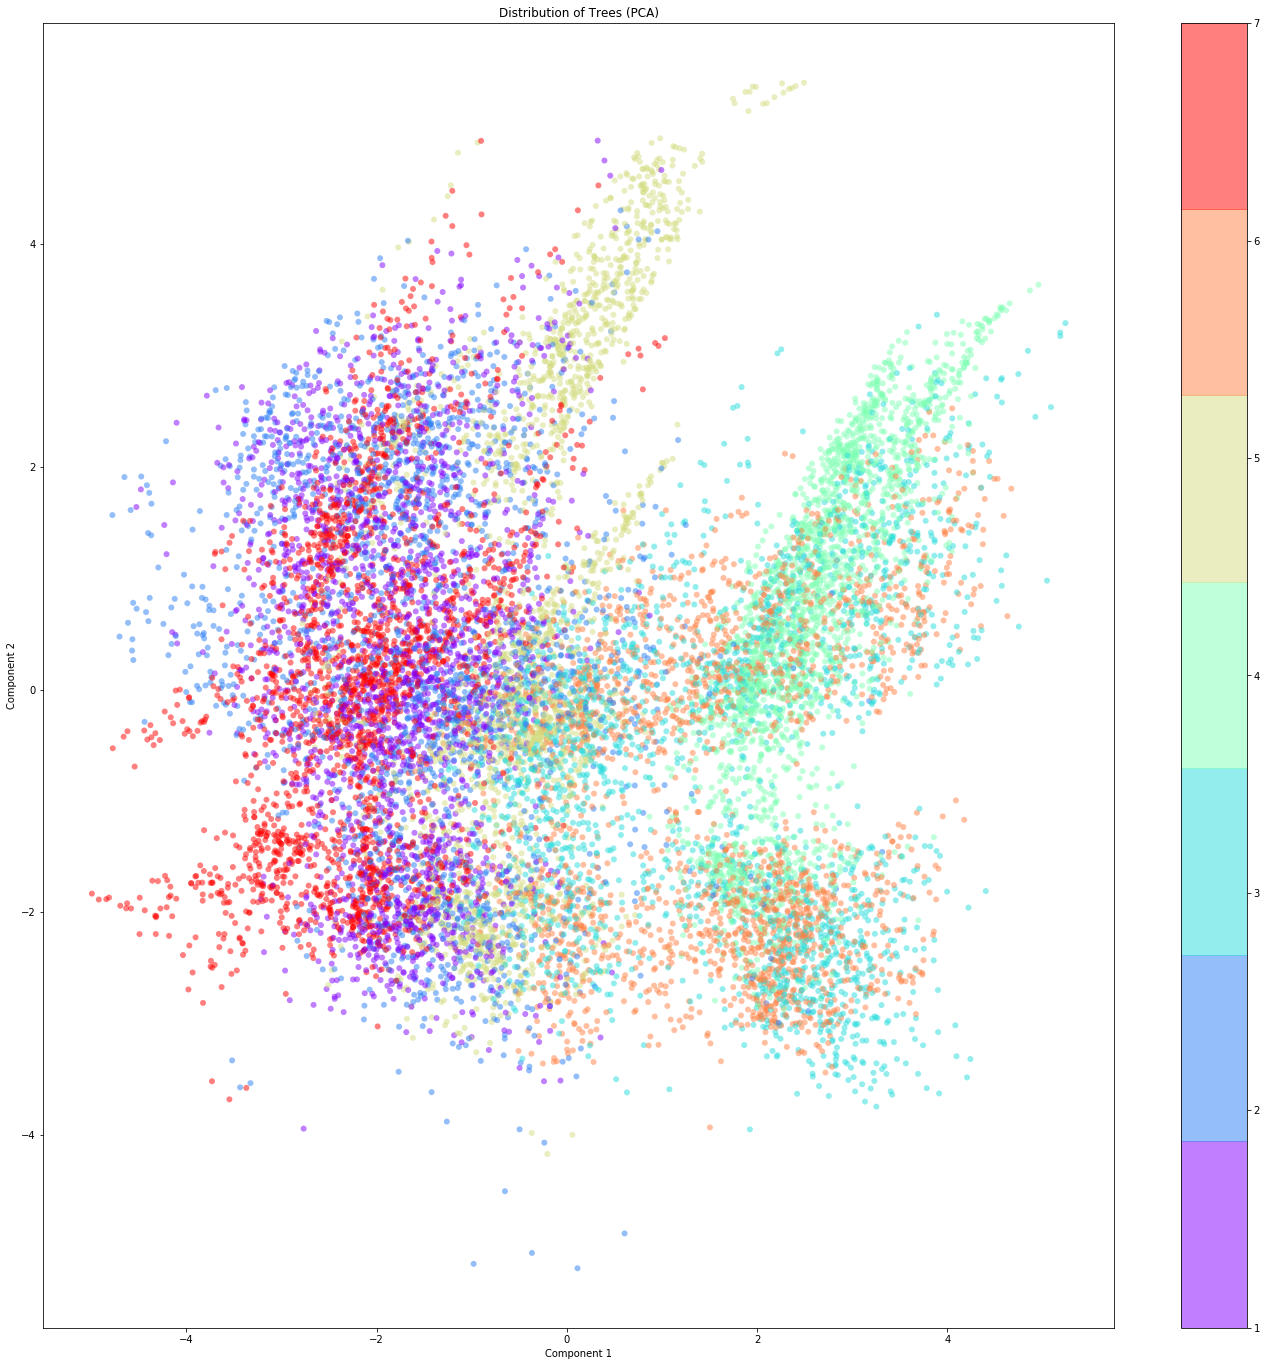

In [44]:
plt.scatter(x[:, 0], x[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 7))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.rcParams['figure.figsize']=(6,6)
plt.title("Distribution of Trees (PCA)")
plt.savefig("PCA")
plt.show()


In [47]:
#let's look at the 2 separate PCA components with respect to the original features

In [ ]:
#principal component 1

In [64]:
pca1 = (pd.DataFrame(pca.components_[0], index = x_data.columns))
pca1.sort_values(by=0, ascending = False).head()

,0
WA4,0.407754
Slope,0.256886
ST10,0.207176
ST3,0.177425
ST1,0.112051


In [46]:
#principal component 2

In [65]:
pca2 = (pd.DataFrame(pca.components_[1], index = x_data.columns))
pca2.sort_values(by=0, ascending = False).head()

,0
shade_9am,0.416893
WA1,0.329884
ST30,0.230767
ST29,0.184088
ST3,0.139998
